In [1]:
# Import required packages
import numpy as np               # for mathematical operations, for arrays
import pandas as pd              # Used for different data manipulation tasks
import matplotlib.pyplot as plt  # Used for Plotting 
import random                    # For random number generator
import warnings
warnings.filterwarnings('ignore')# To avoid warnings note while running the notebook

# Section 1 : Implementing Gradient Descent

Gradient Descent is an first order optimization algorithm to find the local minimum differentiable function (usually a loss function or an objective function). We start with a random point on the function and move in the negative direction of the gradient of the function to reach the find minimum.

Let $F(x)$ be a differentiable function parameterised by $x$ and $x^*$ be the parameter value which minimises $F(x)$. The initial value is $x_0=a_0$. To determine $x^*$ using gradient descent, at each of the $i^{th}$ the parameter updation rule is:

\begin{align*}
x_i = x_{i-1} - \eta \nabla F(a_{i-1}), \hspace{1cm} i\geq 1
\end{align*}  
where $x_i$ is updated value of the parameter in the $i^{th}$ iteration. 

\begin{align*}
\eta \nabla F(a_{i-1}) = \eta \frac{dF}{dx}\bigr \rvert_{x=a_{i-1}}
\end{align*} 

**Stopping Criteria**: Following are three ways which are used as stopping criteria in gradient descent algorithm:
1. Limiting number of iterations
2. Threshold for change in the parameter (i.e difference between the updated parameter and parameter in the previous iteration) --> Change in parameter > Threshold
3. Threshold for change in gradient step
                  
**Question** : Find $x^*$ which minimises $F(x) = (x+5)^2$ using gradient descent 

**Note : Few variables are set to a given value, read the instructions in the pseudo code**

**Pseudo Code**:
1. Initialise the parameter ('x') with some random number,set learning rate = 0.01(section 4 has details on "how to select appropriate learning rate for a given problem"), set threshold = 0.000001,
2. Define a function for calculating differential of F (Hint : Use lambda method for single line of code)
3. Compute the updated value of the parameter using the formula: $x_i = xi-1 - \eta \nabla F(a_{i-1})$ 
4. Iterate over step 3 until the stopping criteria is satisfied (You have to choose stopping criteria appropriately)

## 1.1 Implementing Code
Implement the above pseudo code and print the optimum value of $x$ and $F(x)$. Also print the number of iterations required to reach that optimum.

**Note : Carefully choose your stopping criteria for reaching optimum**

Derivative of F(x) is 2(x + 5)

In [2]:
# Initialize x with a random value
x = 0
eta = 0.01 # learning rate
threshold = 0.000001 # To decide when to stop updating parameters
num_iter = 0

# Derivative
f = lambda n: (n + 5)**2
f_grad = lambda n: 2*(n + 5)

x_prev = 20**10
while abs(x_prev - x)>=threshold:
    x_prev = x
    x = x - eta * f_grad(x)
    num_iter += 1

print("Optimum value of x = {}".format(x))
print("Optimum value of F(x) = {}".format(f(x)))
print("Number of iterations  = {}".format(num_iter))

Optimum value of x = -4.999951128099857
Optimum value of F(x) = 2.3884626235677676e-09
Number of iterations  = 571


# Section 2 : Linear Regression - Finding the Regression parameters using Normal Equation (Analytical Approach)
**Dataset** : dataset1.csv (given)

Given a dataset (here dataset1.csv), find the coefficients (parameters) using the Normal Equation and predict the outputs for the same dataset (dataset1.csv). Given input features in matrix $X$ and observed output or target vector $y$, the regression parameters are given by the equation:
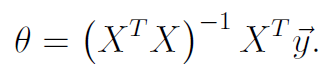


**Pseudo Code:**
1. Append ones to X, let say that as "X_appended" (This is to be done when there is intercept, if you know before hand that intercept is zero, then this step can be ignored)
2. Find the pseudo Inverse of the X_appended
3. Find the dot product of transpose of X_appended and target vector (y),
4. Find "theta" (parameters) using "Normal Equation" given above (i.e Matrix multiplication of outputs of Step 2 and Step 3)
5. Predict ouputs for X_new by appending it with ones and then using the formula $y=X_{new}\theta$

**Note : When you perform matrix multiplications or dot products on vectors or matrices, always keep track of the matrix or vectors shapes. This helps you in avoiding implementation errors.**

<div class="alert alert-block alert-warning">
**Implementation Note:** Step 1 is crucial. We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>

In [3]:
# Import X, y from "dataset1.csv"
# X and y are numpy array, Hint : store the data in the pandas dataframe and then convert it to numpy array
df = pd.read_csv("dataset1.csv")
M = df.shape[0] # number of training examples
X = np.array(df["X"])
X_appended = np.c_[np.ones(M), X]
y = np.array(df["y"])

theta = np.dot(np.dot(np.linalg.inv(np.dot(X_appended.T, X_appended)), X_appended.T), y)
print("Learned parameters: ", *theta)

Learned parameters:  17.789247311827985 4.9018909899888765


### 2.1 Function to predict the outputs
Implement the predict function below. Predict the outputs for the given data (dataset1.csv), plot the predicted outputs Vs input features and scatter plot for dataset1.csv (X,y)

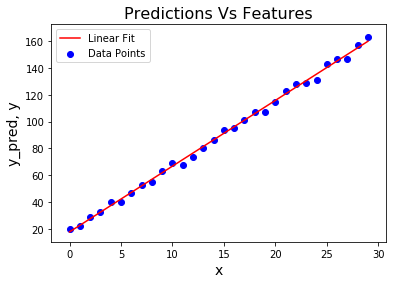

In [5]:
def predict(X, theta):
    """
    Predictions of X for a given theta.
    
    Parameters
    ----------
    X : array with size of (m x n)
    
    theta : array with size of (n+1, 1).
    
    Returns
    -------
    predictions : array of size (m x 1)
    
    """
    # Number of training examples
    M = X.shape[0]
    
    # Need to first append a column of ones
    X_new = np.c_[np.ones(M), X]
    
    # Predict
    prediction = np.dot(X_new, theta)

    return prediction

# Your predictions for the dataset1.csv
y_pred = predict(X, theta)

# plot a line Predictions Vs features and scatter plot for the training data X,y
plt.plot(X, y_pred, color='red', label="Linear Fit")
plt.scatter(X, y, color='blue', label="Data Points")
plt.title("Predictions Vs Features", size=16)
plt.legend()
plt.xlabel("x", size = 14)
plt.ylabel("y_pred, y", size=14)
plt.show()

# Section 3 : Linear Regression - Find the Regression parameters using Gradient Descent
This section is about applying gradient descent algorithm to find theta at which a cost function (Mean Squared Error) is minimum. This can be done using the gradient descent algorithm discussed in Section 1, where $x$ is replaced by the regression parameters. 

Refer to pseudo code in Section 1 for gradient descent algorithm. In simple terms, we initialise the regression parameters with some random number and we compute the gradient step to update the regression parameters.

### 3.1. Import and visualise the dataset

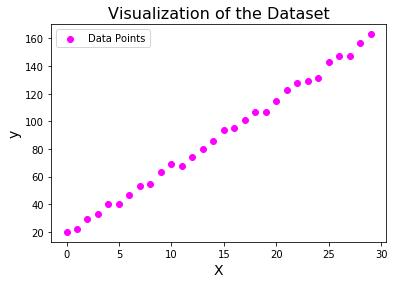

In [6]:
# Import the data from dataset1.csv - Same as Section 2
# Import X and y as numpy array, Hint : store the data in the pandas dataframe and then convert it to numpy array
df = pd.read_csv("dataset1.csv")
M = df.shape[0] # number of training examples
N = df.shape[1] - 1 # number of features (without the intercept)
X = np.array(df["X"]).reshape((M, N))
X_appended = np.c_[np.ones(M), X]
y = np.array(df["y"]).reshape((M, N))

# Scatter Plot the data X and y for visualisation
plt.scatter(X, y, color='magenta', label="Data Points")
plt.title("Visualization of the Dataset", size=16)
plt.xlabel("X", size=14)
plt.ylabel("y", size=14)
plt.legend()
plt.show()

### 3.2. Compute Cost Function - Mean Squared Error (MSE) 
The cost function used is Mean Squared Error (MSE) represented as $J(\theta)$ and is given by:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is a linear model given by: 
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. This way you can know whether you choose high learning rate or low learning rate. Suppose if your learning rate is too high, you can see your cost will go up and down, but will not converge. If you choose good learning rate, then you can see your cost going down smoothly and converges.

In this you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

In [8]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array with the shape of (m x n+1)
        where m is the number of examples,n is the number of features
        n+1 == n features + 1 for bias term(intercept as a feature)
    
    y : array with the shape of (m,1)
    
    theta : array with the shape of (n+1,1)
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    squared_error = np.square(np.dot(X, theta) - y)
    J = 0.5 * np.mean(squared_error)
    return J

## 3.3. Implementation of Gradient Descent 

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).


**Important implementation notes**

The function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a python list. If you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [9]:
def gradientDescent(X_appended, y, theta, alpha, precision = 0.001):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X_appended : array with shape of (m x n+1). Note : n+1 = n features + 1 intercept
    
    y : array with shape of (m, 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    precision : float, (One of the Stopping criteria). This is compared with the change in the cost from previous iter.
    
    Returns
    -------
    theta : array wih shape of (n+1,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    Count : Integer, Number of iterations taken to converge
    
    Cost : Float, Mean squared error at the end of the iteration
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    # number of training examples
    M = X_appended.shape[0]
    
    J_history = []
    count = 0
    prev_cost = 20**10 # some high value
    cost = computeCost(X_appended, y, theta)
    
    while prev_cost - cost > precision:
        prev_cost = cost
        theta = theta - (alpha/M) * np.dot(X_appended.T, (np.dot(X_appended, theta) - y))
        cost = computeCost(X_appended, y, theta)
        J_history.append(cost)
        count += 1
        
    return theta, J_history, cost, count

### Run gradientDescent function to train the model here
**Note : Use the learning rate(alpha) and precision given below. Initialise theta with zeros is suggested here (but you can initialise with different numbers)**

Print the final theta (learnt parameters), number of iterations to converge, value of cost function at the convergence.

In [10]:
# initialize fitting parameters with zeros
theta = np.zeros((2,1))

# Play with these setting to see how these parameters play a huge, for a decent converge use below parameters
precision = 0.000001
alpha = 0.001

##################################### Your Code here ########################################
theta, J_history, final_cost, num_iter = gradientDescent(X_appended, y, theta, alpha, precision)
print("Learned parameters:", *theta)
print("Number of iterations to converge:", num_iter)
print("Value of cost function at convergence:", final_cost)

Learned parameters: [17.6687466] [4.90802378]
Number of iterations to converge: 18995
Value of cost function at convergence: 2.424134514167511


## 3.4. Plot the Training Curve
**Tip:** Initially the change in the loss(J) are drastic and dominating. So while plotting you may remove the first 10% of the iterations and then plot to see a smooth curve in the training process

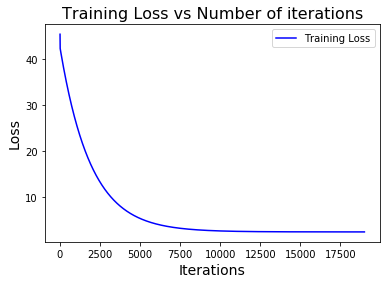

In [11]:
plt.plot(list(range(num_iter))[10:], J_history[10:], color='blue', label="Training Loss")
plt.title("Training Loss vs Number of iterations", size=16)
plt.ylabel("Loss", size=14)
plt.xlabel("Iterations", size=14)
plt.legend()
plt.show()

## 3.5. Predict Outputs and Plot the results
Same as Step 5 in the Section 2. You can use the same function predict(X, theta)

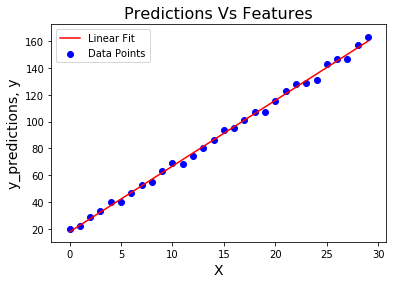

In [14]:
# plot a line for predictions and scatter plot for the training data X,y
y_predictions = predict(X, theta)
plt.plot(X, y_predictions, color='red', label="Linear Fit")
plt.scatter(X, y, color='blue', label="Data Points")
plt.title("Predictions Vs Features", size=16)
plt.xlabel("X", size = 14)
plt.ylabel("y_predictions, y", size=14)
plt.legend()
plt.show()

# Section 4 : Selecting appropriate learning rate
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞. So dont worry even if you cost as inf or NaN

**Repeat the training as in Section 3 with different values of alpha as listed below. Print the alpha, cost and number of iterations it took for every alpha**

In [15]:
theta = np.zeros((2,1))
precision = 0.000001

# You can change this set of alphas and try out different, but keep your range less than 1
alphas = [0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.003, 0.005, 0.007, 0.01,0.03, 0.05, 0.07, 0.1, 0.3]

# Write your code here
for alpha in alphas:
    theta = np.zeros((2,1))
    theta, J_history, final_cost, num_iter = gradientDescent(X_appended, y, theta, alpha, precision)
    print("Learning rate alpha:", alpha)
    print("Number of iterations to converge:", num_iter)
    print("Value of cost function at convergence:", final_cost)
    print()

Learning rate alpha: 0.0001
Number of iterations to converge: 146029
Value of cost function at convergence: 2.4413078221495095

Learning rate alpha: 0.0003
Number of iterations to converge: 55663
Value of cost function at convergence: 2.4285868952040355

Learning rate alpha: 0.0005
Number of iterations to converge: 35347
Value of cost function at convergence: 2.4260422656254055

Learning rate alpha: 0.0007
Number of iterations to converge: 26165
Value of cost function at convergence: 2.424951548553128

Learning rate alpha: 0.001
Number of iterations to converge: 18995
Value of cost function at convergence: 2.424134514167511

Learning rate alpha: 0.003
Number of iterations to converge: 7029
Value of cost function at convergence: 2.4228624540119243

Learning rate alpha: 0.005
Number of iterations to converge: 4412
Value of cost function at convergence: 2.4226074531485455

Learning rate alpha: 0.007
Number of iterations to converge: 1
Value of cost function at convergence: 4863.8085300011

## Section 5: Questions on Analytical and Gradient Descent approaches

1. Are the results from both the analytical and gradient descent approach are same? If not, why?
2. When do u prefer analytical approach and gradient descent approach? Hint: Explain interms of size of the dataset
3. Can we use different cost function in place of MSE? If we do, where will be changes in the gradient descent step?(Just mention using words, equations are not required)
4. How does the initialisation of the parameters $\theta$ effects the convergence? In this case we initialised $\theta$ to zeros. What happens if we choose closer to solution and farther to solution?
5. Any drawbacks of Gradient descent that you could think of? Hint : Interms of Convergence rate.
6. What if number of features increases and how does it effect the gradient descent approach and analytical approach? Note:This might require some time to look for appropriate concepts. But do note that this difference is very important to understand.
7. Comment your observations on selecting appropriate learning rate.

**Write your answers in the following Markdown**

1. The results from the analytical approach and the Gradient Descent based approach are the same. In both the methods, we are trying to minimize the squared error loss. The analytical approach gives us a closed form solution for this, but in gradient descent we achieve it iteratively.

2. * Gradient Descent approach is preferred over the analytical approach when the number of features is large, as Gradient Descent is $O(kN^2)$, whereas the analytical approach is $O(N^3)$.
   * The analytical approach is preferred when the number of features is small and the size of the dataset is also low, so that the computation of the inverse of matrix $X^{T} X$ does not become very expensive.

3. We can use different cost functions such as mean absolute error, log-loss etc., but the cost function must be differentiable. In the gradient descent step, the gradient (derivative) of the cost function will change accordingly. For best convergence, we should a cost function that has a single global minimum.

4. * In the case of MSE cost function, there is a single global minimum (same as local minimum). Therefore the gradient descent step always converges to the correct minimum point. 
   * Initializing the parameters closer to the solution reduces the number of iterations needed for convergence; initializing them farther from the solution increases the number of iterations needed for convergence.
   * When the cost function has multiple local minima, a given choice of initial parameters can make the gradient descent step get stuck in a local minimum (different from global minimum). In this case, multiple random initializations can be used and the one that leads to the global minimum point can be chosen.

5. Drawbacks of Gradient Descent:
    * We have to choose the learning rate alpha carefully; if it is too low, the rate of convergence will be very slow, but if it is too high, we might overstep the minimum point and it could even result in divergence.
    * For a single update step, we have to sum over all the training examples. This makes gradient descent very slow for large datasets.
    * We can get stuck in local optima if we use non-convex cost functions.
    * We can use gradient descent only when the cost function is differentiable.

6. * Increasing the number of features will increase the size of the matrix $X^{T} X$, whose size is (N+1, N+1). Increase in N makes it more difficult to find the inverse of the matrix. It is computationally more intensive to use the analytical approach when the number of features is large. The normal equation approach is $O(N^3)$.
   * Gradient Descent time complexity is $O(kN^2)$ (where k = number of iterations).
   * Thus when the number of features increases, Gradient Descent is a better method than the analytical approach.

7. * When the learning rate is too low, (for example, 0.0001), the gradient descent algorithm takes a long time to converge, as in each step, the parameter is updated by a very small amount. The number of iterations needed for converge is very high(146029 iterations).
   * When the learning rate is too high, the parameters are updated by very large step sizes. A very large learning rate can also lead to overstepping the minimum point and the value diverges, as is borne out by the examples where the learning rate is high, causing the model to converge after a single iteration and very high final cost values.
   * Therefore, the right way to select alpha is to test the model for different values and choose the one that leads to smooth convergence to the global minima